Plot the locations of the profiles for the different regions. 

In [1]:
import os
import glob
import netCDF4
import logging
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import calendar
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [2]:
logger = logging.getLogger("EMODnet-Chemistry-Data")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [3]:
datadir = "/data/EMODnet/Eutrophication/Split/"
figdir = "../figures/EMODnet2022/Histograms/"
if not os.path.exists(figdir):
    os.makedirs(figdir)
varlist = ["phosphate", "silicate", "ammonium", "chlorophyll-a", 
           "dissolved_inorganic_nitrogen", "dissolved_oxygen"]

varlistfig = ["Phosphate", "Silicate", "Ammonium", "Chlorophyll-a", 
           "Dissolved Inorganic Nitrogen", "Dissolved Oxygen"]

## Loop on the variables

In [77]:
reload(emodnetchemistry)
for varname in varlist:
    logger.info("Working on variable {}".format(varname))
    datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
    nfiles = len(datafilelist)
    logger.info("Working on {} files".format(nfiles))
    datafilelist

    timeobs = np.array([])
    dateobs = np.array([])
    obsdepth = np.array([])
    
    years = []
    months = []
    obsval = []

        
    for datafile in datafilelist:
        
        logger.info("Working on {}".format(datafile))
        regionkey = os.path.basename(datafile).split("_")[0]
        
        with netCDF4.Dataset(datafile, "r") as nc:
            
            # Read all variables from netCDF file
            varnamenc = (list(nc.variables.keys())[-1])
            logger.debug("Name in netCDF file: {}".format(varnamenc))
            timeunits = nc.variables["obstime"].units
            times = nc.variables["obstime"][:]
            depth = nc.variables["obsdepth"][:]
            values = nc.variables[varnamenc][:]
            dates = netCDF4.num2date(times, timeunits, only_use_cftime_datetimes=False)
            
            # Append vectors
            # obsdepth = np.append(obsdepth, depth)
            
            months_region = [dd.month for dd in dates.data] 
            years_region = [dd.year for dd in dates.data]
            
            years.append(years_region)
            months.append(months_region)
            obsval.append(values)
                
    
    logger.info("Creating histograms")
    emodnetchemistry.make_histo_values(obsval, varname, figdir, stack=True)
    #emodnetchemistry.make_histo_month(months, varname, figdir, stack=True)
    #emodnetchemistry.make_histo_year(years, varname, figdir, stack=True)

INFO:EMODnet-Chemistry-Data:Working on variable phosphate
INFO:EMODnet-Chemistry-Data:Working on 6 files
INFO:EMODnet-Chemistry-Data:Working on /data/EMODnet/Eutrophication/Split/ArcticSea_Water_body_phosphate.nc
DEBUG:EMODnet-Chemistry-Data:Name in netCDF file: Water body phosphate
INFO:EMODnet-Chemistry-Data:Working on /data/EMODnet/Eutrophication/Split/BalticSea_Water_body_phosphate.nc
DEBUG:EMODnet-Chemistry-Data:Name in netCDF file: Water body phosphate
INFO:EMODnet-Chemistry-Data:Working on /data/EMODnet/Eutrophication/Split/BlackSea_Water_body_phosphate.nc
DEBUG:EMODnet-Chemistry-Data:Name in netCDF file: Water body phosphate
INFO:EMODnet-Chemistry-Data:Working on /data/EMODnet/Eutrophication/Split/MediterraneanSea_Water_body_phosphate.nc
DEBUG:EMODnet-Chemistry-Data:Name in netCDF file: Water body phosphate
INFO:EMODnet-Chemistry-Data:Working on /data/EMODnet/Eutrophication/Split/NorthAtlantic_Water_body_phosphate.nc
DEBUG:EMODnet-Chemistry-Data:Name in netCDF file: Water body 

## Depth polar plot

In [71]:
plot_month_depth_ndata(obsdepth, months, os.path.join(figdir, "month_depth_histo_{}".format(varname)))

## Counting by region and variable

In [4]:
datacount = np.zeros((len(varlist), 6))
for iivar, varname in enumerate(sorted(varlist)):
    datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
    
    
    for iifile, datafile in enumerate(datafilelist):
        regionkey = os.path.basename(datafile).split("_")[0]
        
        with netCDF4.Dataset(datafile, "r") as nc:
            
            npoints = len(nc.variables["obstime"][:])
            datacount[iivar, iifile] = npoints
            logger.info(f"{varname} | {regionkey} | {npoints}")

INFO:EMODnet-Chemistry-Data:ammonium | ArcticSea | 1875
INFO:EMODnet-Chemistry-Data:ammonium | BalticSea | 310461
INFO:EMODnet-Chemistry-Data:ammonium | BlackSea | 49405
INFO:EMODnet-Chemistry-Data:ammonium | MediterraneanSea | 72126
INFO:EMODnet-Chemistry-Data:ammonium | NorthAtlantic | 26269
INFO:EMODnet-Chemistry-Data:ammonium | NorthSea | 415782
INFO:EMODnet-Chemistry-Data:chlorophyll-a | ArcticSea | 1959486
INFO:EMODnet-Chemistry-Data:chlorophyll-a | BalticSea | 335013
INFO:EMODnet-Chemistry-Data:chlorophyll-a | BlackSea | 41214
INFO:EMODnet-Chemistry-Data:chlorophyll-a | MediterraneanSea | 7547401
INFO:EMODnet-Chemistry-Data:chlorophyll-a | NorthAtlantic | 1824640
INFO:EMODnet-Chemistry-Data:dissolved_inorganic_nitrogen | ArcticSea | 244
INFO:EMODnet-Chemistry-Data:dissolved_inorganic_nitrogen | BalticSea | 367005
INFO:EMODnet-Chemistry-Data:dissolved_inorganic_nitrogen | BlackSea | 42341
INFO:EMODnet-Chemistry-Data:dissolved_inorganic_nitrogen | MediterraneanSea | 78045
INFO:EMO

<ipython-input-23-2a8c6deeab63>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([" ", "Arctic\nOcean", "Baltic\nSea", "Black\nSea", "Mediterranean\nSea",
<ipython-input-23-2a8c6deeab63>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(varlistsorted, fontsize=16)


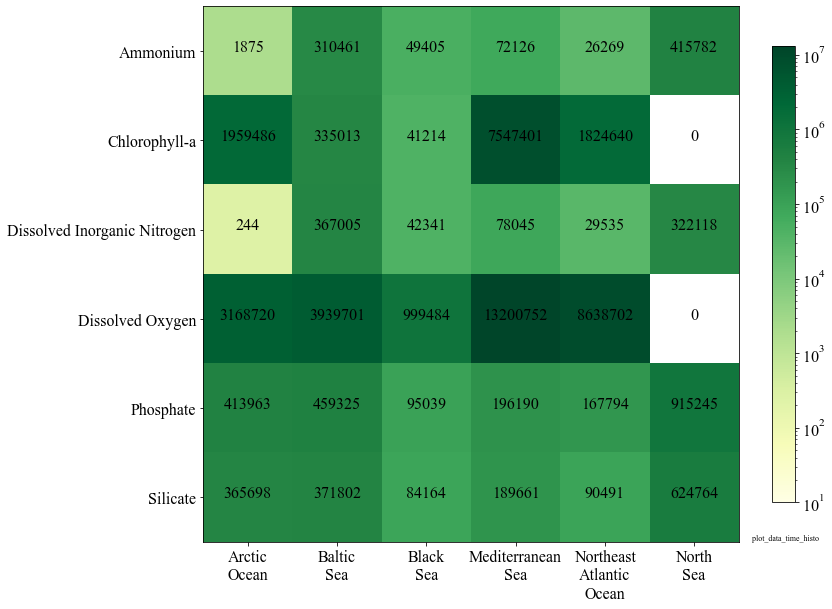

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
im = ax.imshow(datacount, cmap=plt.cm.YlGn, 
               norm=colors.LogNorm(vmin=10., vmax=datacount.max()))

# Add text labels
MM, NN = datacount.shape
for ii in range(0, MM):
    for jj in range(0, NN):
        ax.text(jj, ii, int(datacount[ii, jj]), ha="center")
ax.set_xticklabels([" ", "Arctic\nOcean", "Baltic\nSea", "Black\nSea", "Mediterranean\nSea", 
                    "Northeast\nAtlantic\nOcean", "North\nSea"], fontsize=16)
plt.colorbar(im, shrink=.7)
varlistsorted = sorted(varlistfig)
varlistsorted.insert(0, "")
ax.set_yticklabels(varlistsorted, fontsize=16)
ax.text(1.15, 0., 'plot_data_time_histo', horizontalalignment='right', verticalalignment='bottom', 
        transform = ax.transAxes, fontsize=8)
# plt.savefig(os.path.join(figdir, "datacount"))
plt.show()